In [21]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [22]:
# Load the dataset
data = pd.read_csv('River.csv')

# Check the columns and a few rows to identify the exact column names
print(data.columns)
print(data.head())  # Check a few rows of the dataset to ensure column names are correct


Index(['Index', 'pH', 'Nitrate', 'Chloride', 'Color', 'Turbidity', 'Odor',
       'Chlorine', 'Total Dissolved Solids', 'Water Temperature', 'Target'],
      dtype='object')
   Index        pH   Nitrate    Chloride         Color  Turbidity      Odor  \
0      2  5.443762  3.816994  230.995630  Light Yellow   0.319956  3.414619   
1      7  7.258203  9.261676  182.242341     Colorless   0.047803  3.144199   
2      9  7.100650  3.620641  157.043934     Colorless   0.050613  2.713379   
3     20  9.686076  9.588365  240.350234  Faint Yellow   0.040746  2.937562   
4     44  5.400853  5.739483  177.395747  Light Yellow   0.345791       NaN   

   Chlorine  Total Dissolved Solids  Water Temperature  Target  
0  3.560224              570.054094          11.643467       0  
1  2.325094              214.553104          15.891905       0  
2  2.284971              113.909077          11.899376       0  
3  3.338544              270.921435           7.824436       0  
4  2.770273              4

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
data['Color'] = label_encoder.fit_transform(data['Color'])  # Example for the 'Color' column
# Apply the same for other categorical columns if needed (e.g., 'Odor', etc.)

# Now, proceed with defining the features (X) and target (Y)
X = data[['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids','Water Temperature']].values
Y = data['Target'].values  # Assuming 'Target' is the water safety indicator (0 or 1)

# Convert to float32 for neural network compatibility
X = X.astype('float32')
Y = Y.astype('float32')


In [24]:
# Define the correct features and target based on the columns in the dataset
X = data[['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids','Water Temperature']].values  # Modify with the correct column names
Y = data['Target'].values  # Assuming 'target' is the water safety indicator (0 or 1)

# Convert to float32 for neural network compatibility
X = X.astype('float32')
Y = Y.astype('float32')

In [25]:
# Scaling the features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Reshaping the data for RNN [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # Timesteps = 1

In [27]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [28]:
# Build the RNN model
model = Sequential()

# Add the RNN layer with 64 units and L2 regularization
model.add(SimpleRNN(units=64, activation='tanh',
                    input_shape=(X_train.shape[1], X_train.shape[2]),
                    kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization

# Add a Dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model with 50 epochs and a batch size of 32
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


2302/2302 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7859 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 2/50
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.7852 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 3/50
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7867 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 4/50
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7839 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 5/50
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7879 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 6/50
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.7859 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 7/50
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.7886 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 8/50
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.7873 - loss: nan - val_accuracy: 0.7838 - val_loss: nan
Epoch 9/50


In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7912 - loss: nan
Test Loss: nan, Test Accuracy: 0.7889477610588074


In [32]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to binary (0 or 1)
predictions = (predictions > 0.5).astype('int32')  # Threshold of 0.5 for binary classification

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step


In [33]:
# Print classification report
print(classification_report(Y_test, predictions))

# Print accuracy score
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     18160
         1.0       0.00      0.00      0.00      4858

    accuracy                           0.79     23018
   macro avg       0.39      0.50      0.44     23018
weighted avg       0.62      0.79      0.70     23018

Accuracy: 0.7889477799982623


c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

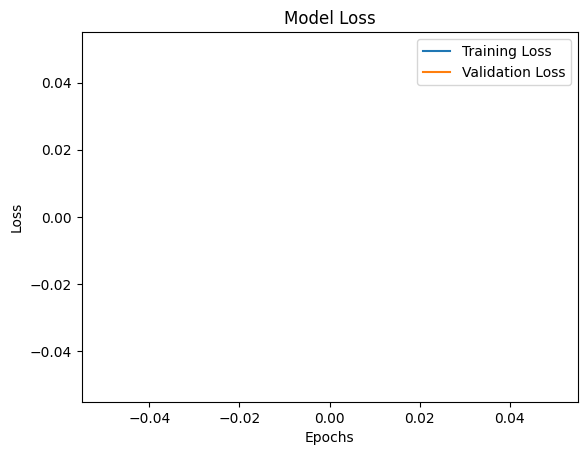

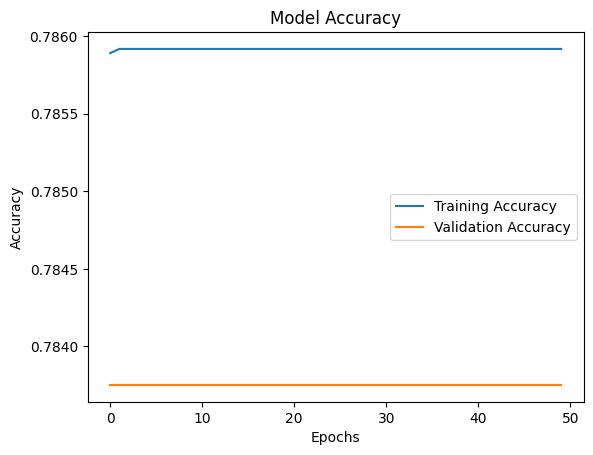

In [34]:
# Plot the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
import joblib
joblib.dump(model, 'rnn.pkl')


['rnn.pkl']